Importacion de las librerias

In [11]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

Carga, entrenamiento y normalizacion de los datos

In [3]:
mnist = keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

Compilación del modelo, entrenamiento con 10 epocas y gráfico el historial de entrenamiento

Epoch 1/10
1875/1875 [==============================] - 43s 22ms/step - loss: 0.1464 - accuracy: 0.9563
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0505 - accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0318 - accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0199 - accuracy: 0.9940
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0139 - accuracy: 0.9956
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0098 - accuracy: 0.9969
Epoch 7/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0079 - accuracy: 0.9973
Epoch 8/10
1875/1875 [==============================] - 53s 29ms/step - loss: 0.0059 - accuracy: 0.9981
Epoch 9/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0051 - accuracy: 0.9985
Epoch 10/10
1875/1875 [==============================] - 58s 31m

<Axes: >

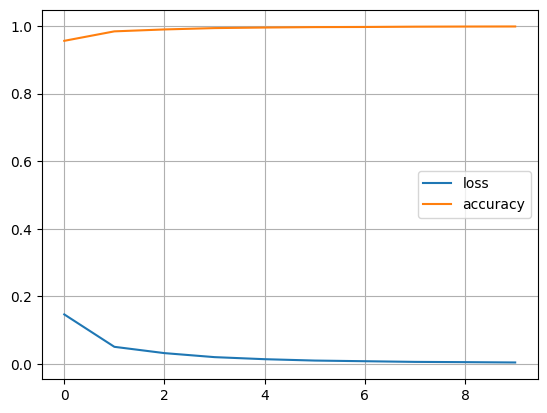

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=10)

pd.DataFrame(history.history).plot(grid=True)

Evaluacion del modelo

In [5]:
loss, accuracy = model.evaluate(training_images, training_labels)
print("Perdida en el conjunto de entranamiento: ", loss)
print("Precisión en el conjunto de entrenamiento", accuracy)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
loss2, accuracy2 = model.evaluate(test_images, test_labels)
print("Perdida en el conjunto de prueba: ", loss2)
print("Precisión en el conjunto de pruebas", accuracy2)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.0062 - accuracy: 0.9978
Perdida en el conjunto de entranamiento:  0.006187114864587784
Precisión en el conjunto de entrenamiento 0.9978166818618774
--------------------------------------------------------------
--------------------------------------------------------------
313/313 [==============================] - 2s 6ms/step - loss: 0.0615 - accuracy: 0.9859
Perdida en el conjunto de prueba:  0.06145710498094559
Precisión en el conjunto de pruebas 0.9858999848365784


Predicción en una imagen especifica

In [6]:
index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification: {classification.reshape(-1,1)}')

Label: 2
1/1 [==============================] - 0s 118ms/step
Classification: [[8.06237130e-15]
 [7.37758650e-13]
 [1.00000000e+00]
 [2.08733341e-19]
 [4.16256719e-23]
 [1.18507446e-26]
 [2.37991410e-17]
 [2.51906779e-23]
 [8.41428075e-19]
 [7.67444521e-21]]


Visualización de las convoluciones y Pooling

In [18]:
print(test_labels[:30])

first_image = 3
second_image = 6
third_image = 25
print("Imagenes selecionadas:")
print(test_labels[first_image])
print(test_labels[second_image])
print(test_labels[third_image])


[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Imagenes selecionadas:
0
4
0


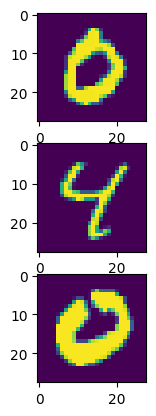

In [19]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[first_image])
axarr[1].imshow(test_images[second_image])
axarr[2].imshow(test_images[third_image])

1/1 [==============================] - 0s 29ms/step


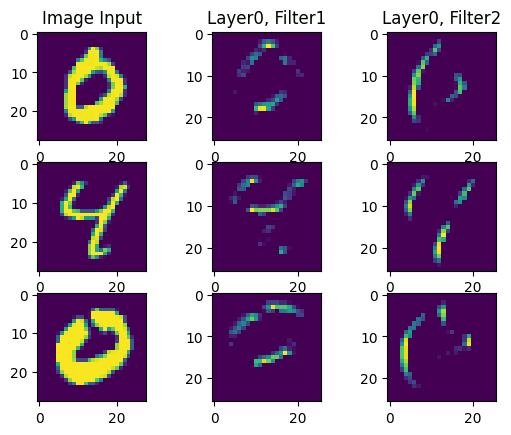

In [22]:
layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

f, axarr = plt.subplots(3,3)
axarr[0, 0].set_title("Image Input")
axarr[0, 0].imshow(test_images[first_image])
f1 = activation_model.predict(test_images[first_image].reshape(1, 28, 28, 1))[layer]
axarr[0, 1].set_title("Layer"+str(layer)+", Filter1")
axarr[0, 1].imshow(f1[0, : , : , filter1])
axarr[0, 2].set_title("Layer"+str(layer)+", Filter2")
axarr[0, 2].imshow(f1[0, : , : , filter2])

axarr[1, 0].imshow(test_images[second_image])
f2 = activation_model.predict(test_images[second_image].reshape(1, 28, 28, 1))[layer]
axarr[1, 1].imshow(f2[0, : , : , filter1])
axarr[1, 2].imshow(f2[0, : , : , filter2])

axarr[2, 0].imshow(test_images[third_image])
f3 = activation_model.predict(test_images[third_image].reshape(1, 28, 28, 1))[layer]
axarr[2, 1].imshow(f3[0, : , : , filter1])
axarr[2, 2].imshow(f3[0, : , : , filter2])


Cambio de seleción de imagenes

In [23]:
print(test_labels[:30])

first_image = 2
second_image = 5
third_image = 14
print("Imagenes selecionadas:")
print(test_labels[first_image])
print(test_labels[second_image])
print(test_labels[third_image])


[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Imagenes selecionadas:
1
1
1


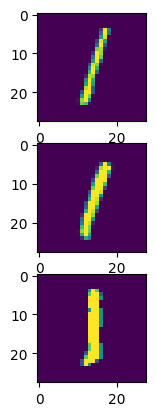

In [24]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[first_image])
axarr[1].imshow(test_images[second_image])
axarr[2].imshow(test_images[third_image])

1/1 [==============================] - 0s 25ms/step


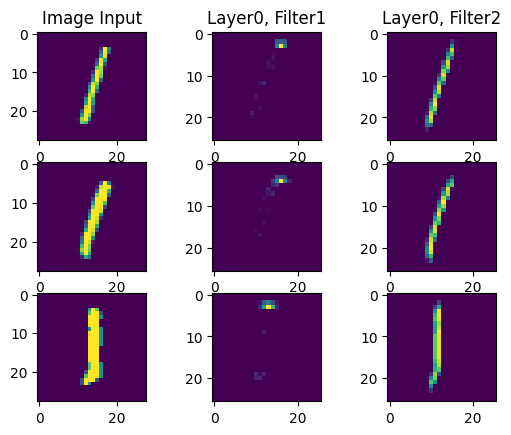

In [25]:
f, axarr = plt.subplots(3,3)
axarr[0, 0].set_title("Image Input")
axarr[0, 0].imshow(test_images[first_image])
f1 = activation_model.predict(test_images[first_image].reshape(1, 28, 28, 1))[layer]
axarr[0, 1].set_title("Layer"+str(layer)+", Filter1")
axarr[0, 1].imshow(f1[0, : , : , filter1])
axarr[0, 2].set_title("Layer"+str(layer)+", Filter2")
axarr[0, 2].imshow(f1[0, : , : , filter2])

axarr[1, 0].imshow(test_images[second_image])
f2 = activation_model.predict(test_images[second_image].reshape(1, 28, 28, 1))[layer]
axarr[1, 1].imshow(f2[0, : , : , filter1])
axarr[1, 2].imshow(f2[0, : , : , filter2])

axarr[2, 0].imshow(test_images[third_image])
f3 = activation_model.predict(test_images[third_image].reshape(1, 28, 28, 1))[layer]
axarr[2, 1].imshow(f3[0, : , : , filter1])
axarr[2, 2].imshow(f3[0, : , : , filter2])